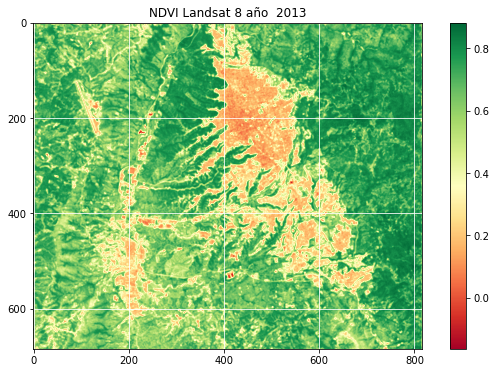

In [86]:
import ee
import geemap
import numpy as np
from osgeo import gdal
from osgeo import osr
import time
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# init the ee object
ee.Initialize()
 
# Define the area
area = ee.Geometry.Polygon([[[-73.20499420166016, 7.035816390014566],[-73.05839538574219, 7.035816390014566],[-73.05839538574219, 7.158806222674093],[-73.20499420166016, 7.158806222674093],[-73.20499420166016, 7.035816390014566]]])
 
# define the image
Map = geemap.Map()
roi = ee.Geometry.Polygon(
    [[[-73.20499420166016, 7.035816390014566],
      [-73.05839538574219, 7.035816390014566],
      [-73.05839538574219, 7.158806222674093],
      [-73.20499420166016, 7.158806222674093],
      [-73.20499420166016, 7.035816390014566]]], None, False)  
landsat_ts = geemap.landsat_timeseries(roi=roi, start_year=2000, end_year=2020, start_date='01-01', end_date='12-31')
landsat_vis = {
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1],
    'bands': ['NIR', 'SWIR1', 'Blue']}
img = ee.Image(landsat_ts.first())

# do any ee operation here
ndvi = ee.Image(img.normalizedDifference(['NIR', 'Red']))
timedate = img.get('GENERATION_TIME').getInfo()
 
# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat().addBands(ndvi)
 
# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=area,
  maxPixels=1e8,
  scale=20);
 
 
# get data into three different arrays
data = np.array((ee.Array(latlon.get("nd")).getInfo()))
lats = np.array((ee.Array(latlon.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon.get("longitude")).getInfo()))
 
# get the unique coordinates
uniqueLats = np.unique(lats)
uniqueLons = np.unique(lons)
 
# get number of columns and rows from coordinates
ncols = len(uniqueLons)    
nrows = len(uniqueLats)
 
# determine pixelsizes
ys = uniqueLats[1] - uniqueLats[0] 
xs = uniqueLons[1] - uniqueLons[0]
 
# create an array with dimensions of image
arr = np.zeros([nrows, ncols], np.float32) #-9999
 
# fill the array with values
counter =0
for y in range(0,len(arr),1):
    for x in range(0,len(arr[0]),1):
        if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
            counter+=1
            arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner
 
# in case you want to plot the image    
fig, ax = plt.subplots(figsize=(10,6))
imgen = ax.imshow(arr, cmap='RdYlGn')
fig.colorbar(imgen, ax=ax)
plt.title('NDVI Landsat 8 año  2013')

import matplotlib.ticker as plticker
myInterval=200
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.grid(which='major', axis='both', linestyle='-',color='w')

plt.show()

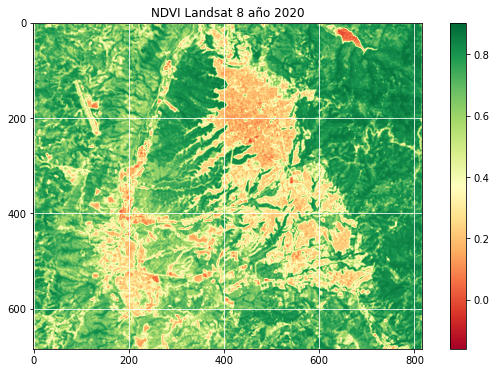

In [85]:
area = ee.Geometry.Polygon([[[-73.20499420166016, 7.035816390014566],[-73.05839538574219, 7.035816390014566],[-73.05839538574219, 7.158806222674093],[-73.20499420166016, 7.158806222674093],[-73.20499420166016, 7.035816390014566]]])
 
# define the image
Map = geemap.Map()
roi = ee.Geometry.Polygon(
    [[[-73.20499420166016, 7.035816390014566],
      [-73.05839538574219, 7.035816390014566],
      [-73.05839538574219, 7.158806222674093],
      [-73.20499420166016, 7.158806222674093],
      [-73.20499420166016, 7.035816390014566]]], None, False)  
landsat_ts = geemap.landsat_timeseries(roi=roi, start_year=2019, end_year=2020, start_date='01-01', end_date='12-31')
landsat_vis = {
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1],
    'bands': ['NIR', 'SWIR1', 'Blue']}

img_2 = ee.Image(landsat_ts.first())
# do any ee operation here
ndvi = ee.Image(img_2.normalizedDifference(['NIR', 'Red']))
timedate = img_2.get('GENERATION_TIME').getInfo()
 
# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat().addBands(ndvi)
 
# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=area,
  maxPixels=1e8,
  scale=20);
 
 
# get data into three different arrays
data = np.array((ee.Array(latlon.get("nd")).getInfo()))
lats = np.array((ee.Array(latlon.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon.get("longitude")).getInfo()))
 
# get the unique coordinates
uniqueLats = np.unique(lats)
uniqueLons = np.unique(lons)
 
# get number of columns and rows from coordinates
ncols = len(uniqueLons)    
nrows = len(uniqueLats)
 
# determine pixelsizes
ys = uniqueLats[1] - uniqueLats[0] 
xs = uniqueLons[1] - uniqueLons[0]
 
# create an array with dimensions of image
arr_2 = np.zeros([nrows, ncols], np.float32) #-9999
 
# fill the array with values
counter =0
for y in range(0,len(arr_2),1):
    for x in range(0,len(arr_2[0]),1):
        if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
            counter+=1
            arr_2[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner
 
# in case you want to plot the image    
fig, ax = plt.subplots(figsize=(10,6))
imgen_2 = ax.imshow(arr_2, cmap='RdYlGn')
fig.colorbar(imgen_2, ax=ax)
plt.title('NDVI Landsat 8 año 2020')

myInterval=200
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.grid(which='major', axis='both', linestyle='-',color='w')

plt.show()

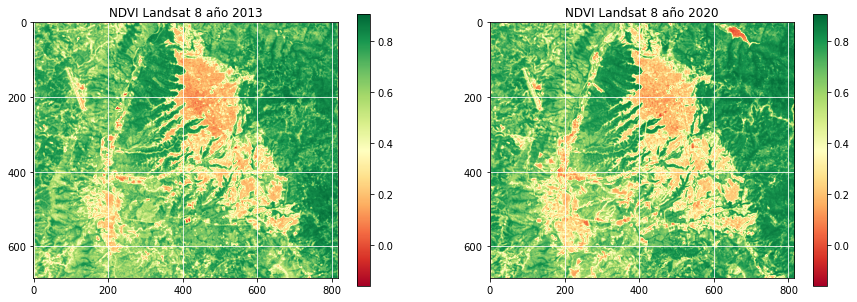

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5)) 

myInterval=200
loc = plticker.MultipleLocator(base=myInterval)

axs[0].imshow(arr, cmap='RdYlGn')
axs[0].set_title('NDVI Landsat 8 año 2013')
axs[0].xaxis.set_major_locator(loc)
axs[0].yaxis.set_major_locator(loc)
axs[0].grid(which='major', axis='both', linestyle='-',color='w')
fig.colorbar(imgen_2, ax=axs[0])

axs[1].imshow(arr_2, cmap='RdYlGn')
axs[1].set_title('NDVI Landsat 8 año 2020')
axs[1].xaxis.set_major_locator(loc)
axs[1].yaxis.set_major_locator(loc)
axs[1].grid(which='major', axis='both', linestyle='-',color='w')
fig.colorbar(imgen_2, ax=axs[1])
plt.savefig('originales_13_20.jpg', dpi=500)
plt.show()

In [5]:
unique, frequency = np.unique(arr, return_counts = True)  
count = np.asarray((unique, frequency )) 
print("The values and their frequency are:\n",count)
print(len(count[0])) 
print(len(count[1]))

The values and their frequency are:
 [[-0.16356108 -0.15264678 -0.14441645 ...  0.88037729  0.88088512
   0.882442  ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
434102
434102


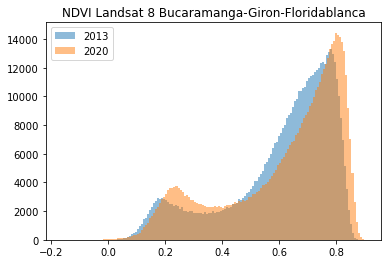

In [94]:
plt.hist(arr.ravel(),bins=150,alpha=0.5,label='2013')
plt.hist(arr_2.ravel(),bins=150,alpha=0.5,label='2020')
plt.title('NDVI Landsat 8 Bucaramanga-Giron-Floridablanca')
plt.legend(loc = 'upper left')
plt.savefig('his_originales_13_20.jpg', dpi=500)
plt.show()

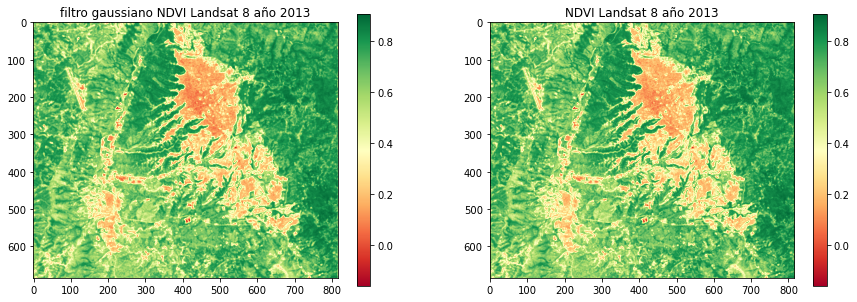

In [7]:
from scipy import ndimage
from scipy.interpolate import NearestNDInterpolator
gaussian_filtered = ndimage.gaussian_filter(arr,sigma = 0.5)

fig, axs = plt.subplots(1, 2, figsize=(15, 5)) 

axs[0].imshow(gaussian_filtered, cmap='RdYlGn')
axs[0].set_title('filtro gaussiano NDVI Landsat 8 año 2013')
fig.colorbar(imgen_2, ax=axs[0])

axs[1].imshow(arr, cmap='RdYlGn')
axs[1].set_title('NDVI Landsat 8 año 2013')
fig.colorbar(imgen_2, ax=axs[1])
plt.show()

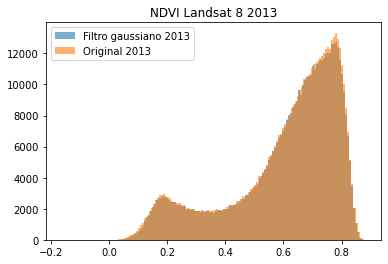

In [8]:
plt.hist(gaussian_filtered.ravel(),bins=150,alpha=0.6,label='Filtro gaussiano 2013')
plt.hist(arr.ravel(),bins=150,alpha=0.6,label='Original 2013')
plt.title('NDVI Landsat 8 2013')
plt.legend(loc = 'upper left')
plt.show()

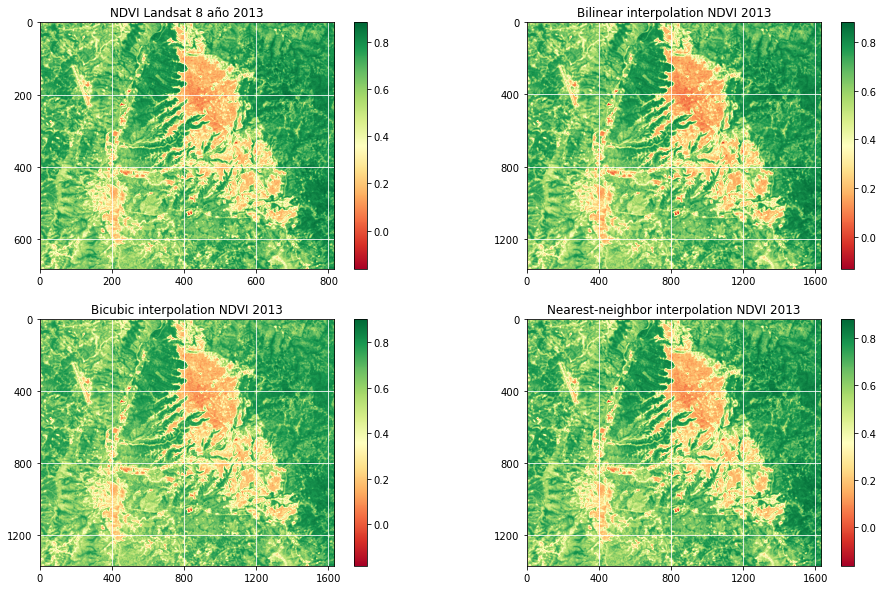

In [95]:
import cv2

image_INTER_LINEAR=cv2.resize(arr,None,fx=2,fy=2,interpolation = cv2.INTER_LINEAR)

img_INTER_CUBIC=cv2.resize(arr,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)

img_INTER_NEAREST=cv2.resize(arr,None,fx=2,fy=2,interpolation=cv2.INTER_NEAREST)

fig, axs = plt.subplots(2, 2, figsize=(16, 10)) 

loc = plticker.MultipleLocator(base=200)

imgen_arr = axs[0, 0].imshow(arr, cmap='RdYlGn')
axs[0, 0].set_title('NDVI Landsat 8 año 2013')
axs[0, 0].xaxis.set_major_locator(loc)
axs[0, 0].yaxis.set_major_locator(loc)
axs[0, 0].grid(which='major', axis='both', linestyle='-',color='w')
fig.colorbar(imgen_arr, ax=axs[0, 0])

imgen_lin = axs[0, 1].imshow(image_INTER_LINEAR, cmap='RdYlGn')
axs[0, 1].set_title('Bilinear interpolation NDVI 2013')
loc = plticker.MultipleLocator(base=400)
axs[0, 1].xaxis.set_major_locator(loc)
axs[0, 1].yaxis.set_major_locator(loc)
axs[0, 1].grid(which='major', axis='both', linestyle='-',color='w')
fig.colorbar(imgen_lin, ax=axs[0, 1])

imgen_CUBIC = axs[1, 0].imshow(img_INTER_CUBIC, cmap='RdYlGn')
axs[1, 0].set_title('Bicubic interpolation NDVI 2013')
loc = plticker.MultipleLocator(base=400)
axs[1, 0].xaxis.set_major_locator(loc)
axs[1, 0].yaxis.set_major_locator(loc)
axs[1, 0].grid(which='major', axis='both', linestyle='-',color='w')
fig.colorbar(imgen_CUBIC, ax=axs[1, 0])

imgen_NEAREST = axs[1, 1].imshow(img_INTER_NEAREST, cmap='RdYlGn')
axs[1, 1].set_title('Nearest-neighbor interpolation NDVI 2013')
loc = plticker.MultipleLocator(base=400)
axs[1, 1].xaxis.set_major_locator(loc)
axs[1, 1].yaxis.set_major_locator(loc)
axs[1, 1].grid(which='major', axis='both', linestyle='-',color='w')
fig.colorbar(imgen_NEAREST, ax=axs[1, 1])
plt.savefig('interpo_13.jpg', dpi=500)
plt.show()

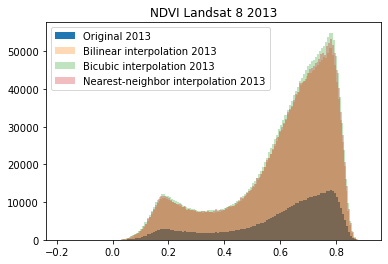

In [101]:
plt.hist(arr.ravel(),bins=150,alpha=1,label='Original 2013')
plt.hist(image_INTER_LINEAR.ravel(),bins=150,alpha=0.3,label='Bilinear interpolation 2013')
plt.hist(img_INTER_CUBIC.ravel(),bins=150,alpha=0.3,label='Bicubic interpolation 2013')
plt.hist(img_INTER_NEAREST.ravel(),bins=150,alpha=0.3,label='Nearest-neighbor interpolation 2013')
plt.title('NDVI Landsat 8 2013')
plt.legend(loc = 'upper left')
plt.savefig('histograma_interpolaciones.jpg', dpi=500)
plt.show()